In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [7]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

# MLP network with 2 hidden layers

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## Without using BachNormalization and Dropout

In [0]:
model_1_n=Sequential()

model_1_n.add(Dense(364,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.074,seed=None)))


model_1_n.add(Dense(52,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.196,seed=None)))


model_1_n.add(Dense(output_dim,activation="softmax"))

In [15]:
model_1_n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_n = model_1_n.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2813 - acc: 0.9165 - val_loss: 0.1489 - val_acc: 0.9549
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1045 - acc: 0.9694 - val_loss: 0.1060 - val_acc: 0.9682
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0665 - acc: 0.9799 - val_loss: 0.0857 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0471 - acc: 0.9857 - val_loss: 0.0863 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0820 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0815 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0778 - val_acc

Test score: 0.1335273921233908
Test accuracy: 0.9739


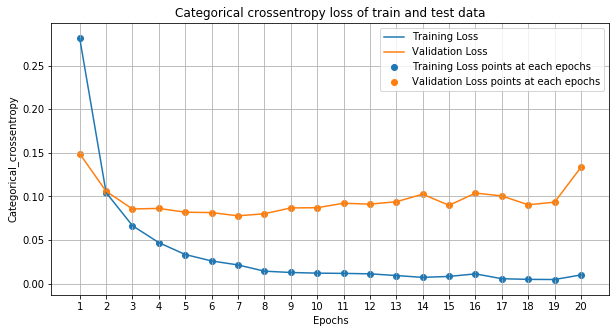

In [16]:
%matplotlib inline
score = model_1_n.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history_n.history['val_loss']
ty = history_n.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

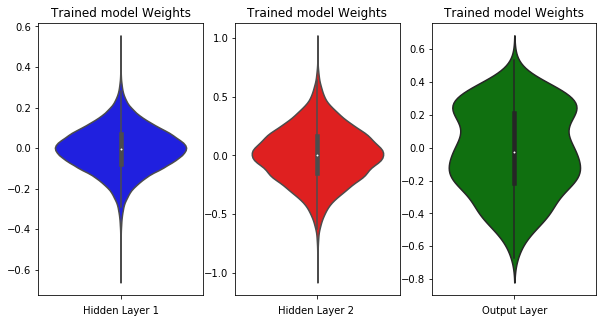

In [17]:
w_after = model_1_n.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w=w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,3,3)
plt.title("Trained model Weights")
ax=sns.violinplot(y=out_w,color="g")
plt.xlabel("Output Layer")

plt.show()

## By using BachNormalization and Dropout

In [0]:
model_1=Sequential()

model_1.add(Dense(364,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.074,seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(52,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.196,seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim,activation="softmax"))


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.6436 - acc: 0.8049 - val_loss: 0.2045 - val_acc: 0.9385
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3103 - acc: 0.9100 - val_loss: 0.1444 - val_acc: 0.9561
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2369 - acc: 0.9314 - val_loss: 0.1176 - val_acc: 0.9644
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1987 - acc: 0.9416 - val_loss: 0.1017 - val_acc: 0.9692
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1727 - acc: 0.9494 - val_loss: 0.0965 - val_acc: 0.9707
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1619 - acc: 0.9532 - val_loss: 0.0886 - val_acc: 0.9722
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1442 - acc: 0.9586 - val_loss: 0.0812 - val_acc

Test score: 0.064355510669254
Test accuracy: 0.9822


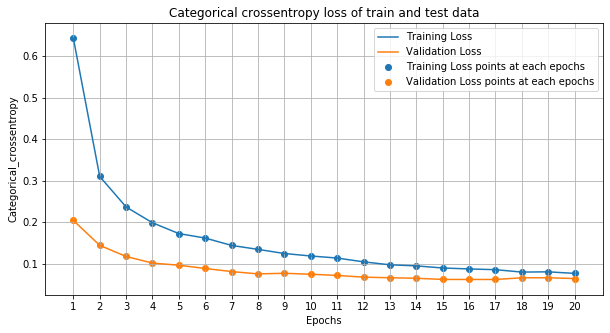

In [0]:
%matplotlib inline
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

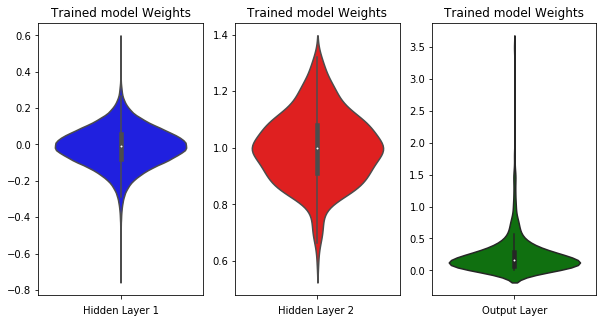

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w=w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,3,3)
plt.title("Trained model Weights")
ax=sns.violinplot(y=out_w,color="g")
plt.xlabel("Output Layer")

plt.show()

# MLP network with 3 Hidden Layers

## Without using BachNormalization and Dropout

In [0]:
model_2_n=Sequential()

model_2_n.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))

model_2_n.add(Dense(216,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.096,seed=None)))

model_2_n.add(Dense(92,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.147,seed=None)))

model_2_n.add(Dense(output_dim,activation="softmax"))

In [19]:
model_2_n.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_2_n=model_2_n.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,validation_data=(X_test,Y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2292 - acc: 0.9318 - val_loss: 0.1148 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0821 - acc: 0.9747 - val_loss: 0.0850 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0523 - acc: 0.9831 - val_loss: 0.0814 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0380 - acc: 0.9875 - val_loss: 0.0792 - val_acc: 0.9768
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0277 - acc: 0.9913 - val_loss: 0.0933 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0282 - acc: 0.9906 - val_loss: 0.0863 - val_acc: 0.9763
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0779 - val_acc

Test score: 0.09780777548565857
Test accuracy: 0.9777


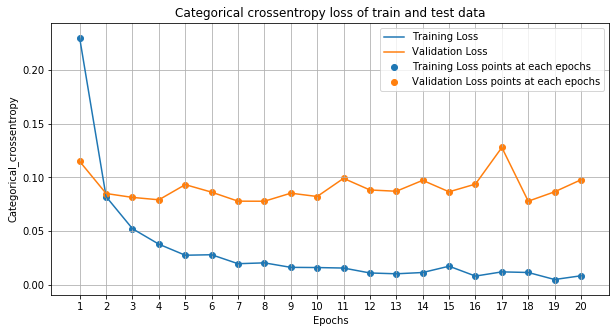

In [21]:
%matplotlib inline
score = model_2_n.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_2_n.history['val_loss']
ty = history_2_n.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

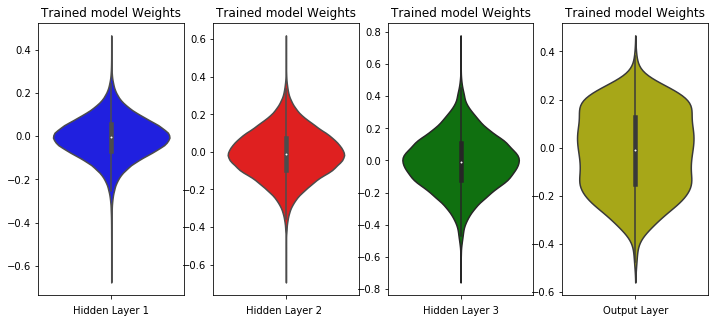

In [22]:
w_after = model_2_n.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
out_w=w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4,3)
plt.title("Trained model Weights")
ax=sns.violinplot(y=h3_w,color="g")
plt.xlabel("Hidden Layer 3")

plt.subplot(1,4,4)
plt.title("Trained model Weights")
ax=sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

plt.show()

## By using BachNormalization and Dropout

In [0]:
model_2=Sequential()

model_2.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(216,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.096,seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(92,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.147,seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim,activation="softmax"))

In [29]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_2=model_2.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,validation_data=(X_test,Y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.6850 - acc: 0.7915 - val_loss: 0.1922 - val_acc: 0.9423
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2889 - acc: 0.9154 - val_loss: 0.1364 - val_acc: 0.9583
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2178 - acc: 0.9377 - val_loss: 0.1115 - val_acc: 0.9663
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1857 - acc: 0.9466 - val_loss: 0.1045 - val_acc: 0.9679
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1595 - acc: 0.9536 - val_loss: 0.0876 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1465 - acc: 0.9561 - val_loss: 0.0854 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1298 - acc: 0.9626 - val_loss: 0.0844 - val_acc

Test score: 0.06517312385361874
Test accuracy: 0.9837


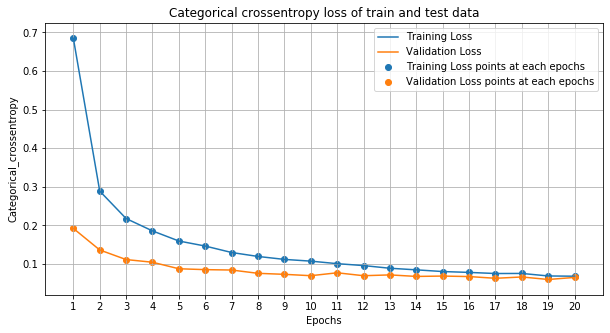

In [30]:
%matplotlib inline
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_2.history['val_loss']
ty = history_2.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

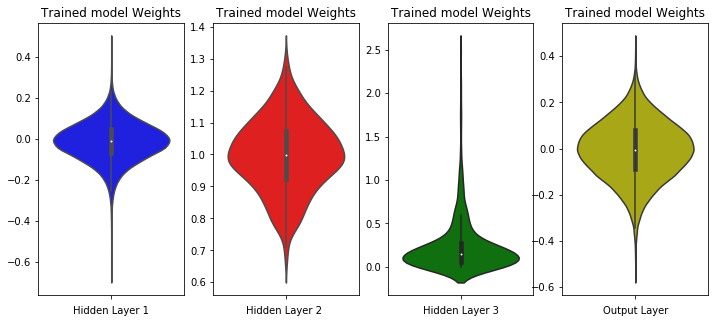

In [31]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
out_w=w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4,3)
plt.title("Trained model Weights")
ax=sns.violinplot(y=h3_w,color="g")
plt.xlabel("Hidden Layer 3")

plt.subplot(1,4,4)
plt.title("Trained model Weights")
ax=sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

plt.show()

# MLP network with 5 Hidden Layers

## Without using BachNormalization and Dropout

In [0]:
model_3_n=Sequential()

model_3_n.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))

model_3_n.add(Dense(205,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.099,seed=None)))

model_3_n.add(Dense(128,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.125,seed=None)))

model_3_n.add(Dense(87,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.152,seed=None)))

model_3_n.add(Dense(45,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.211,seed=None)))

model_3_n.add(Dense(output_dim,activation="softmax"))

In [24]:
model_3_n.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_3_n=model_3_n.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2476 - acc: 0.9250 - val_loss: 0.1159 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0952 - acc: 0.9715 - val_loss: 0.1264 - val_acc: 0.9622
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0645 - acc: 0.9798 - val_loss: 0.0924 - val_acc: 0.9731
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0500 - acc: 0.9842 - val_loss: 0.0839 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0843 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0333 - acc: 0.9892 - val_loss: 0.0884 - val_acc: 0.9763
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0282 - acc: 0.9909 - val_loss: 0.0876 - val_acc

Test score: 0.09170836706758746
Test accuracy: 0.9805


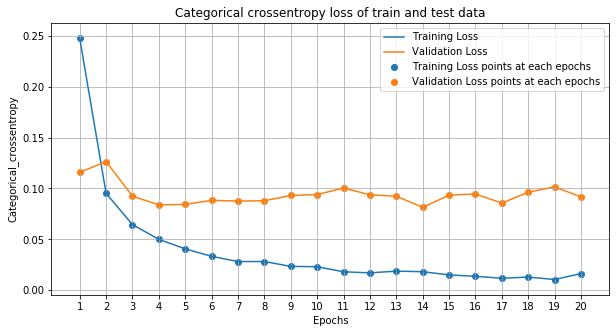

In [25]:
%matplotlib inline
score = model_3_n.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_3_n.history['val_loss']
ty = history_3_n.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

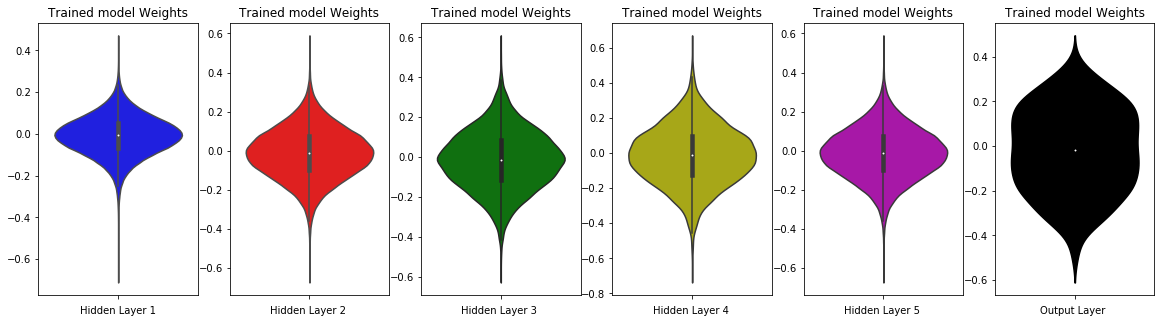

In [26]:
w_after = model_3_n.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
h4_w=w_after[6].flatten().reshape(-1,1)
h5_w=w_after[8].flatten().reshape(-1,1)
out_w=w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='k')
plt.xlabel('Output Layer ')

plt.show()

## By using BachNormalization and Dropout

In [0]:
model_3=Sequential()

model_3.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(205,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.099,seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(128,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.125,seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(87,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.152,seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(45,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.211,seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim,activation="softmax"))

In [0]:
model_3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_3=model_3.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 1.5979 - acc: 0.4732 - val_loss: 0.4243 - val_acc: 0.8919
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.6514 - acc: 0.8039 - val_loss: 0.2318 - val_acc: 0.9333
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.4269 - acc: 0.8841 - val_loss: 0.1807 - val_acc: 0.9503
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.3371 - acc: 0.9126 - val_loss: 0.1494 - val_acc: 0.9595
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2838 - acc: 0.9277 - val_loss: 0.1321 - val_acc: 0.9648
Epoch 6/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2505 - acc: 0.9382 - val_loss: 0.1259 - val_acc: 0.9678
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2288 - acc: 0.9455 - val_loss: 0.1138 -

Test score: 0.08353606338379904
Test accuracy: 0.9815


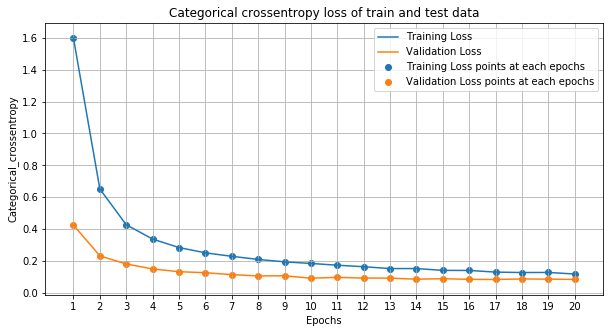

In [0]:
%matplotlib inline
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_3.history['val_loss']
ty = history_3.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,5))
plt.title("Categorical crossentropy loss of train and test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty,label="Training Loss points at each epochs")
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy,label="Validation Loss points at each epochs")
plt.legend()
plt.grid()
plt.show()

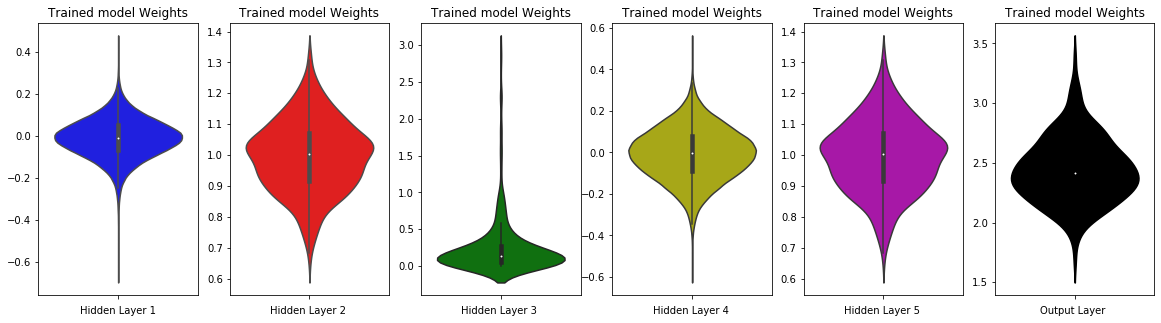

In [0]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
h4_w=w_after[6].flatten().reshape(-1,1)
h5_w=w_after[8].flatten().reshape(-1,1)
out_w=w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='k')
plt.xlabel('Output Layer ')

plt.show()

# Conclusions:-

In [36]:
from prettytable import PrettyTable

table_1=PrettyTable()

print("Table for MLP with 2 Hidden Layers")
table_1.field_names=("Type","Train Loss","Train Accuracy","Test Loss","Test Accuracy")
table_1.add_row(("Without BN and Dropout",0.01,0.996,0.133,0.973))
table_1.add_row(("With BN and Dropout",0.07,0.977,0.064,0.982))
print(table_1)
print("Table for MLP with 3 Hidden Layers")
table_2=PrettyTable()
table_2.field_names=("Type","Train Loss","Train Accuracy","Test Loss","Test Accuracy")
table_2.add_row(("Without BN and Dropout",0.008,0.997,0.097,0.977))
table_2.add_row(("With BN and Dropout",0.068,0.978,0.065,0.983))
print(table_2)
print("Table for MLP with 5 Hidden Layers")
table_3=PrettyTable()
table_3.field_names=("Type","Train Loss","Train Accuracy","Test Loss","Test Accuracy")
table_3.add_row(("Without BN and Dropout",0.016,0.995,0.091,0.980))
table_3.add_row(("With BN and Dropout",0.117,0.972,0.083,0.981))
print(table_3)

Table for MLP with 2 Hidden Layers
+------------------------+------------+----------------+-----------+---------------+
|          Type          | Train Loss | Train Accuracy | Test Loss | Test Accuracy |
+------------------------+------------+----------------+-----------+---------------+
| Without BN and Dropout |    0.01    |     0.996      |   0.133   |     0.973     |
|  With BN and Dropout   |    0.07    |     0.977      |   0.064   |     0.982     |
+------------------------+------------+----------------+-----------+---------------+
Table for MLP with 3 Hidden Layers
+------------------------+------------+----------------+-----------+---------------+
|          Type          | Train Loss | Train Accuracy | Test Loss | Test Accuracy |
+------------------------+------------+----------------+-----------+---------------+
| Without BN and Dropout |   0.008    |     0.997      |   0.097   |     0.977     |
|  With BN and Dropout   |   0.068    |     0.978      |   0.065   |     0.983  

Difference of loss and  between MLP network without BN and Dropout and MLP network with BN and Dropout are not very significant because MNIST data is a simple dataset of hand written characters.